In [1]:
# %load adj_functions.sage
import numpy as np
from numpy import linalg

################################################################################
# Function: idempotents                                                        #
#                                                                              #
# Purpose: find principal idempotents of a Hermitian matrix                    #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#                                                                              #
# Returns: principal idempotents, eigenvalues                                  #
#                                                                              #
################################################################################

def idempotents(A):
    if not matrix(A).is_hermitian():
        print("A is not Hermitian")
        return []
    # Extracts eigenvalues and eigenvectors
    W,V = linalg.eigh(A)
    # Converts eigenvectors into orthonormal basis
    Q, R = linalg.qr(V) 
    Q = matrix(Q)
    # Number of eigenvectors
    A = np.matrix(A)
    n = len(A)
    idems = []
    evals = []
    i = 0
    j = 0
    while i < n:
        # Zero matrix
        E = matrix(n, n, 0)
        # Checks if eigenvectors share an eigenvalue
        while j < n and abs(W[i] - W[j]) < 0.01:
            # Converts eigenvector into column vecror
            v = Q.column(j).column()
            # updates idempotent
            E = E + v*v.conjugate_transpose();
            j = j + 1
        E = E
        idems.append(E)
        evals.append(W[i].round(3))
        i = j
    return idems, evals

################################################################################
# Function: transfer                                                           #
#                                                                              #
# Purpose: return transfer matrix U(t) given adjacency matrix/Hamiltonian      #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   t        float                              time                           #
#   k        integer                            rounding accuracy              #
#                                                                              #
# Returns: transfer U(t)                                                       #
#                                                                              #
################################################################################

def transfer(A, t):
    if not matrix(A).is_hermitian():
        print("A is not Hermitian")
        return []
    idems, evals = idempotents(A)
    # Number of eigenvectors
    A = np.matrix(A)
    n = len(A)
    # Zero matrix
    U = matrix(n, n, 0)
    for i in range(len(idems)):
        # Updates transder matrix
        U = U + exp(-I*t*evals[i])*idems[i]
    return U
#     A = matrix(A)
#     return matrix(exp(-1*I*t*A))

################################################################################
# Function: transfer_at_time_r                                                 #
#                                                                              #
# Purpose: find real part of transfer matrix at specific time and index        #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   i        integer                            row number                     #
#   j        integer                            column number                  #
#                                                                              #
# Returns: real part of U(t) at index [i][j]                                   #
#                                                                              #
################################################################################

def transfer_at_time_r(A,t,i,j):
    U = transfer(A,t)
    if abs(U[i][j].real()) < 0.00001:
        return 0
    return U[i][j].real()

################################################################################
# Function: transfer_at_time_i                                                 #
#                                                                              #
# Purpose: find imaginary part of transfer matrix at specific time and index   #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   i        integer                            row number                     #
#   j        integer                            column number                  #
#                                                                              #
# Returns: imaginary part of U(t) at index [i][j]                              #
#                                                                              #
################################################################################

def transfer_at_time_i(A,t,i,j):
    U = transfer(A,t)
    if abs(U[i][j].imag()) < 0.00001:
        return 0
    return U[i][j].imag()

################################################################################
# Function: transfer_at_time_a                                                 #
#                                                                              #
# Purpose: find absolute value of transfer matrix at specific time and index   #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   i        integer                            row number                     #
#   j        integer                            column number                  #
#                                                                              #
# Returns: absolute value of U(t) at index [i][j]                              #
#                                                                              #
################################################################################

def transfer_at_time_a(A,t,i,j):
    U = transfer(A,t)
    if U[i][j].abs() < 0.00001:
        return 0
    return (U[i][j].abs())^2
    
################################################################################
# Function: parallel                                                           #
#                                                                              #
# Purpose: check whether two vertices are parallel                             #
#                                                                              #
# Arguments:                                                                   #
#   idems    list of matrices     idempotents of an adjacency matrix           #
#   a        integer              first vertex                                 #
#   b        integer              second vertex                                #
#                                                                              #
# Returns: boolean whether vertices are parallel                               #
#                                                                              #
################################################################################

def parallel(a,b,idems):
    for M in idems:
        va = M[a].conjugate()
        vb = M[b]
        anorm=np.sqrt(M[a].dot_product(va))
        bnorm=np.sqrt(M[b].dot_product(M[b].conjugate()))
        if abs(abs(va.dot_product(vb))-anorm*bnorm)>0.0001:
            return False
    return True
    
################################################################################
# Function: cospec                                                             #
#                                                                              #
# Purpose: check whether two vertices are parallel                             #
#                                                                              #
# Arguments:                                                                   #
#   idems    list of matrices     idempotents of an adjacency matrix           #
#   a        integer              first vertex                                 #
#   b        integer              second vertex                                #
#                                                                              #
# Returns: boolean whether vertices are cospectral                             #
#                                                                              #
################################################################################

def cospec(a,b,idems):
    for M in idems:
        if abs(M[a,a]- M[b,b])>0.001:
            return False
    return True

################################################################################
# Function: strcospec                                                          #
#                                                                              #
# Purpose: check whether two vertices are parallel                             #
#                                                                              #
# Arguments:                                                                   #
#   idems    list of matrices     idempotents of an adjacency matrix           #
#   a        integer              first vertex                                 #
#   b        integer              second vertex                                #
#                                                                              #
# Returns: boolean whether vertices are strongly cospectral                    #
#                                                                              #
################################################################################

def strcospec(a,b,idems):
    if cospec(a,b,idems) and parallel(a,b,idems):
        return True
    return False
    
################################################################################
# Function: transfer_plots                                                     #
#                                                                              #
# Purpose: list plots for each entry of transfer matrix from 0 to 3pi          #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   s        character                          choose 'r','i', or 'a'         #
#                                               for real, imaginary, or abs    #
#                                                                              #
# Returns: absolute value of U(t) at index [i][j]                              #
#                                                                              #
################################################################################

def transfer_plots(A,s):
    A = np.matrix(A)
    n = len(A)
    plots = []
    if s == 'r':
        for i in range(n):
            for j in range(n):
                plots.append(plot(transfer_at_time_r(A,x,i,j),0,3*np.pi))
    elif s == 'i':
        for i in range(n):
            for j in range(n):
                plots.append(plot(transfer_at_time_i(A,x,i,j),0,3*np.pi))
    else:
        for i in range(n):
            for j in range(n):
                plots.append(plot(transfer_at_time_a(A,x,i,j),0,3*np.pi))
    chunks = [plots[x:x+n] for x in range(0, len(plots), n)]
    return chunks

In [2]:
# X = matrix([[0,0,1,0,0,0,0],[0,0,1,0,0,0,0],[1,1,0,1,0,0,0],\
#             [0,0,1,0,1,1,1],[0,0,0,1,0,0,0],[0,0,0,1,0,0,0],[0,0,0,1,0,0,0]]); X
# X = matrix([[0,0,0,1,0,0,0,0],[0,0,0,1,0,0,0,0],[0,0,0,1,0,0,0,0],[1,1,1,0,1,0,0,0],\
#             [0,0,0,1,0,1,1,1],[0,0,0,0,1,0,0,0],[0,0,0,0,1,0,0,0],[0,0,0,0,1,0,0,0]]); X
X = matrix([[0,1,0,0],[1,0,1,0],[0,1,0,1],[0,0,1,0]]); X

[0 1 0 0]
[1 0 1 0]
[0 1 0 1]
[0 0 1 0]

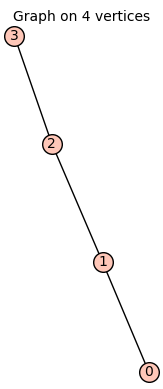

In [3]:
Graph(X)

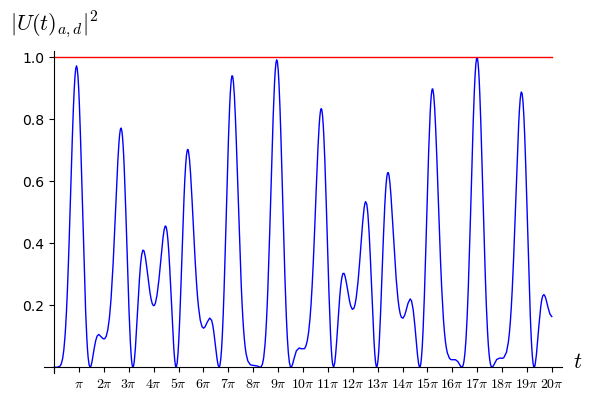

In [4]:
xt = [k * pi for k in range(0,21)]
xt_lbl = ['$0$', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$', '$5\pi$', '$6\pi$','$7\pi$','$8\pi$','$9\pi$','$10\pi$',\
          '$11\pi$','$12\pi$','$13\pi$','$14\pi$','$15\pi$','$16\pi$','$17\pi$','$18\pi$','$19\pi$','$20\pi$']
yt = [0.2,0.4,0.6,0.8,1.0]
yt_lbl = ['0.2', '0.4', '0.6', '0.8', '1.0']
# # sage: plot(sin(x),(x,-2*pi,2*pi), ticks=[xt, yt], tick_formatter = [xt_lbl, yt_lbl])

plt = plot(transfer_at_time_a(X,x,0,3),0,20*np.pi, ticks=[xt,yt], tick_formatter=[xt_lbl,yt_lbl], axes_labels=['$t$', '$|U(t)_{a,d}|^2$'])
lin = plot(1,0,20*np.pi, color="red")
(plt + lin).show()